In [213]:
from IPython.display import display

import pandas as pd
import warnings
from model_drift import settings, helpers
from model_drift.data.utils import nested2series
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

from model_drift.data.padchest import PadChest, LABEL_MAP
import plotly.graph_objects as go

warnings.filterwarnings("ignore")


In [214]:
from model_drift.data.padchest import LABEL_MAP
label_cols = list(LABEL_MAP)
jsonl_file = str(settings.TOP_DIR.joinpath("results", 'classifier', 'padchest-trained', 'frontal_only', "preds.jsonl"))
scores_df = helpers.jsonl_files2dataframe(jsonl_file)
scores_df = pd.concat(
    [
        scores_df,
        pd.DataFrame(scores_df['activation'].values.tolist(), columns=[f"activation.{c}" for c in label_cols])
    ],
    axis=1)
scores_df.head()


100%|██████████| 160819/160819 [00:04<00:00, 32509.19it/s]


,index,score,activation,label,activation.Atelectasis,activation.Cardiomegaly,activation.Consolidation,activation.Edema,activation.Lesion,activation.No Finding,activation.Opacity,activation.Pleural Abnormalities,activation.Pleural Effusion,activation.Pneumonia
0,20536686640136348236148679891455886468_k6ga29.png,"[-2.9898717403411865, 0.021230269223451614, -5...","[0.04788553714752197, 0.5053073763847351, 0.00...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",0.047886,0.505307,0.003428,0.000492,0.031599,0.040083,0.046906,0.223817,0.010098,0.010910
1,113855343774216031107737439268243531979_3k951n...,"[-4.271155834197998, -3.2341253757476807, -7.5...","[0.013773280195891857, 0.03790152817964554, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.013773,0.037902,0.000529,0.000097,0.022773,0.269458,0.025679,0.003461,0.000689,0.003102
2,313723174271082992847610802266403640553-4_hhi4...,"[-1.9546648263931274, -4.485781669616699, -1.7...","[0.12404559552669525, 0.011142521165311337, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.124046,0.011143,0.148217,0.000012,0.022932,0.003598,0.751884,0.655488,0.479314,0.211316
3,105529804483623054726294337265160703666_6zn76a...,"[-2.843719244003296, -2.7252206802368164, -5.9...","[0.055006884038448334, 0.06150144338607788, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.055007,0.061501,0.002591,0.000115,0.016477,0.370590,0.017562,0.013063,0.001621,0.005887
4,102185472428957491598043403159908631419_zb8kco...,"[-2.794471502304077, -4.529303073883057, -5.34...","[0.05762365832924843, 0.01067304890602827, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.057624,0.010673,0.004754,0.000176,0.021283,0.097500,0.051552,0.037033,0.019453,0.026915


In [215]:

data = 'all-data'
jsonl_file = str(settings.TOP_DIR.joinpath("results", 'vae', 'padchest-trained', data, 'preds.jsonl'))
vae_df = helpers.jsonl_files2dataframe(jsonl_file)
vae_df = pd.concat(
    [
        vae_df,
        pd.DataFrame(vae_df['mu'].values.tolist(), columns=[f"mu.{c:0>3}" for c in range(128)])
    ],
    axis=1
)
vae_df.head()


 14%|█▎        | 21764/160819 [00:02<00:14, 9399.99it/s]

In [ ]:
# jsonl_file = str(settings.TOP_DIR.joinpath("results", 'outside-data', "pediatric-vae-preds.jsonl"))
# pvae_df = helpers.jsonl_files2dataframe(jsonl_file)
# pvae_df = pd.concat(
#     [
#         pvae_df,
#         pd.DataFrame(pvae_df['mu'].values.tolist(), columns=[f"mu.{c:0>3}" for c in range(128)])
#     ],
#     axis=1
# )
# pvae_df.head()

100%|██████████| 5232/5232 [00:00<00:00, 9356.88it/s]


,index,mu,logvar,error,mu.000,mu.001,mu.002,mu.003,mu.004,mu.005,...,mu.118,mu.119,mu.120,mu.121,mu.122,mu.123,mu.124,mu.125,mu.126,mu.127
0,Pediatric_Chest_X-ray_Pneumonia/train/NORMAL/I...,"[-0.015300623141229153, 0.026357755064964294, ...","[0.011444917879998684, 0.023694228380918503, -...",0.009123,-0.015301,0.026358,-0.161248,0.006828,-0.024209,0.021338,...,0.029356,0.185193,-0.056293,0.032243,-0.057131,-0.830066,-0.001191,0.068564,-1.404098,-0.102461
1,Pediatric_Chest_X-ray_Pneumonia/train/NORMAL/I...,"[-0.012328023090958595, 0.03272838145494461, -...","[-0.013114223256707191, 0.03820696845650673, -...",0.011135,-0.012328,0.032728,-0.479747,0.052400,-0.081375,0.025304,...,0.024534,0.083026,-0.052110,0.043449,0.019975,-0.219239,0.007368,0.019451,-0.948317,-0.188215
2,Pediatric_Chest_X-ray_Pneumonia/train/NORMAL/I...,"[-0.04322167485952377, 0.060755811631679535, 0...","[0.02963685244321823, 0.05109911039471626, -1....",0.016097,-0.043222,0.060756,0.186926,0.046731,-0.016739,0.083952,...,-0.019800,0.107643,-0.064345,-0.020409,0.035565,-0.163890,-0.010248,0.030458,-1.167260,-0.230910
3,Pediatric_Chest_X-ray_Pneumonia/train/NORMAL/I...,"[-0.029027242213487625, 0.01797046698629856, -...","[-0.004472499713301659, 0.03301604092121124, -...",0.017722,-0.029027,0.017970,-0.395584,0.068490,-0.079396,-0.001521,...,0.024729,0.081604,-0.099854,-0.012942,-0.041262,-0.900648,0.026903,0.070251,-1.144185,0.167255
4,Pediatric_Chest_X-ray_Pneumonia/train/NORMAL/N...,"[0.028366880491375923, 0.07368270307779312, -0...","[-0.008325975388288498, 0.007292307913303375, ...",0.018941,0.028367,0.073683,-0.609924,-0.034713,-0.017765,0.089107,...,-0.048149,0.248163,-0.066515,0.040412,-0.025493,-0.085305,0.003596,0.098388,-1.466721,-0.024784


In [5]:
# Load padchest CSV
pc = PadChest(settings.PADCHEST_FILENAME)
pc.prepare()


pc.merge(vae_df, left_on="ImageID", right_on="index", how='inner')
pc.merge(scores_df, left_on="ImageID", right_on="index", how='inner')


train, val, test = pc.split(settings.PADCHEST_SPLIT_DATES, studydate_index=True)


In [6]:
list(pc.df.columns)

['ImageID',
 'ImageDir',
 'StudyDate_DICOM',
 'StudyID',
 'PatientID',
 'PatientBirth',
 'PatientSex_DICOM',
 'ViewPosition_DICOM',
 'Projection',
 'MethodProjection',
 'Pediatric',
 'Modality_DICOM',
 'Manufacturer_DICOM',
 'PhotometricInterpretation_DICOM',
 'PixelRepresentation_DICOM',
 'PixelAspectRatio_DICOM',
 'SpatialResolution_DICOM',
 'BitsStored_DICOM',
 'WindowCenter_DICOM',
 'WindowWidth_DICOM',
 'Rows_DICOM',
 'Columns_DICOM',
 'XRayTubeCurrent_DICOM',
 'Exposure_DICOM',
 'ExposureInuAs_DICOM',
 'ExposureTime',
 'RelativeXRayExposure_DICOM',
 'ReportID',
 'Report',
 'MethodLabel',
 'Labels',
 'Localizations',
 'LabelsLocalizationsBySentence',
 'labelCUIS',
 'LocalizationsCUIS',
 'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Lesion',
 'No Finding',
 'Opacity',
 'Pleural Abnormalities',
 'Pleural Effusion',
 'Pneumonia',
 'StudyDate',
 'Frontal',
 'age',
 'index',
 'mu',
 'logvar',
 'error',
 'mu.000',
 'mu.001',
 'mu.002',
 'mu.003',
 'mu.004',
 'mu.005',
 '

In [7]:
FLOAT = lambda x: pd.to_numeric(x, errors='coerce').astype(float)
CAT = lambda x: x.astype('category')

vae_cols = {c: FLOAT for c in list(pc.df) if c.startswith("mu.") and 'all' not in c}
score_cols = {c: FLOAT for c in list(pc.df) if c.startswith("activation.") and 'all' not in c}
metadata_cols = {
    'age': FLOAT,
    'Projection': CAT,
    "PatientSex_DICOM": CAT,
    "ViewPosition_DICOM": CAT,
    "Modality_DICOM": CAT,
    "Manufacturer_DICOM": CAT,
    "PhotometricInterpretation_DICOM": CAT,
    "PixelRepresentation_DICOM": CAT,
    "PixelAspectRatio_DICOM": CAT,
    "SpatialResolution_DICOM": FLOAT,
    "BitsStored_DICOM": CAT,
    "WindowCenter_DICOM": FLOAT,
    "WindowWidth_DICOM": FLOAT,
    "Rows_DICOM": FLOAT,
    "Columns_DICOM": FLOAT,
    "XRayTubeCurrent_DICOM": CAT,
    "Exposure_DICOM": FLOAT,
    "ExposureInuAs_DICOM": FLOAT,
    "RelativeXRayExposure_DICOM": FLOAT,
    "Frontal": lambda x: x.astype(str),
    "Pediatric": CAT
}


for c, f in metadata_cols.items():
    pc.df[c] = f(pc.df[c])

In [8]:
pc.df.loc[pc.df['age'] < 12, "Peds"] = '<12y'
pc.df['Pediatric'] = pc.df['Peds'].fillna('>=12y')
pc.df['Pediatric'].value_counts()



>=12y    155519
<12y       5300
Name: Pediatric, dtype: int64

In [9]:
pvae_df['Pediatric'] = '<12y'

In [10]:
all_ped_df = pd.concat([pc.df, pvae_df])

all_ped_df[["Pediatric"]+list(vae_cols)]

,Pediatric,mu.000,mu.001,mu.002,mu.003,mu.004,mu.005,mu.006,mu.007,mu.008,...,mu.118,mu.119,mu.120,mu.121,mu.122,mu.123,mu.124,mu.125,mu.126,mu.127
0,>=12y,0.004903,0.009759,-0.840139,-0.016406,0.012096,0.021054,-0.009488,-0.013038,-0.007536,...,0.008214,-0.124864,-0.011458,-0.035856,-0.005253,-0.525054,-0.012718,-0.015304,1.603692,1.275674
1,>=12y,0.015003,0.008204,-0.873354,-0.000008,-0.065057,0.003706,-0.011845,-0.019623,-0.022494,...,-0.012971,0.116672,0.039970,0.085739,0.074184,0.229820,-0.029106,0.048200,-0.325632,-0.669529
2,>=12y,0.007932,0.017988,-0.004271,0.016084,-0.029747,-0.000219,-0.026263,0.011529,0.005375,...,-0.027014,0.136066,-0.008367,0.004579,-0.013793,-1.722075,0.023675,0.009019,-0.021481,0.648649
3,>=12y,0.019724,0.013938,-0.571398,0.038880,0.047977,0.004053,-0.034299,-0.006654,-0.003766,...,-0.009396,0.090417,-0.011244,-0.067155,-0.050972,0.226032,0.018524,-0.015034,0.068953,0.729789
4,>=12y,-0.039044,-0.007190,-1.345544,0.016048,0.037869,-0.036479,-0.026237,0.021997,-0.024744,...,0.042117,0.080279,0.014332,-0.000268,-0.019087,0.168344,-0.046811,-0.030200,-0.740812,-1.276945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5227,<12y,-0.037355,-0.004716,-0.223054,-0.043860,-0.079772,0.075144,-0.030612,0.042721,0.051152,...,-0.049723,0.088506,-0.107221,0.078236,0.057557,-0.042961,0.010589,0.038109,-1.473002,-0.299723
5228,<12y,-0.063232,0.008780,0.247207,0.074081,0.005340,0.030715,0.017035,0.023397,-0.024480,...,-0.036560,-0.034854,-0.109763,0.024002,0.070907,0.311697,-0.002401,0.028188,-0.597099,-0.048335
5229,<12y,-0.048443,0.044143,0.475988,-0.013113,-0.052051,0.049684,0.018057,0.031787,0.002987,...,-0.010814,-0.133795,-0.087566,0.036279,0.023877,-0.329092,-0.034710,-0.016655,-0.137052,-0.101638
5230,<12y,-0.017312,0.063294,0.539585,0.023244,-0.041532,0.009903,0.090134,0.032368,-0.004417,...,-0.054965,-0.324554,-0.108833,0.035408,0.019570,0.548964,0.001592,-0.029739,-0.448097,0.042223


In [11]:
import matplotlib.pylab as plt
from tqdm import tqdm

from plotly.subplots import make_subplots
import plotly.graph_objects as go

def make_plotly_graph(graphs):
    fig = make_subplots(1, 1, vertical_spacing=0.05, horizontal_spacing=0.05)
    for k, g in graphs.items():
        x = g['fpr']
        y = g['tpr']
        fig.add_trace(go.Line(x=x, y=y, showlegend=True, name=k))

    # fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_yaxes(range=[0, 1.01], constrain="domain")
    fig.update_xaxes(range=[0, 1.01], constrain="domain")
    fig.update_layout(height=400, width=600, margin=go.layout.Margin(
        l=10,  # left margin
        r=10,  # right margin
        b=20,  # bottom margin
        t=20,  # top margin
    ))
    return fig

def chunkify(vals, n):
    i = 0
    while i < len(vals):
        yield vals[i:i+n]
        i += n

bins = 3
qrt = .95
col = "Pediatric"


df = {}
series = pc.df[col]
series = all_ped_df[col]
if "float" in series.dtype.name:
    series = pd.cut(series, bins=bins, retbins=False)

cats = series.unique()
try:
    cats = sorted(cats, key=lambda x: x.left if hasattr(x, "left") else x)
except:
    pass
print(cats)

for cat in tqdm(cats):
    s = series==cat
    m = all_ped_df[vae_cols].corrwith(s)
    df[cat] = m

df = pd.concat(df, axis=1)
top_corr = (df.max(axis=1)-df.min(axis=1)).sort_values().rename("corr")
bp = top_corr.quantile(qrt)
keep = top_corr[top_corr >= bp]
# keep = top_corr.iloc[-8:]


N = 128
fig = make_subplots(2, 1, vertical_spacing=.1)
tp = top_corr.iloc[-N:]
fig.add_trace(
    go.Bar(x=tp.index.map(lambda x: (int(x.split('.')[1]))), y=tp, name="Max Corr. Diff.", showlegend=False),
)
# keep = tp
b = df.loc[keep.index][cats].dropna(axis=1)
for c in list(b):
    pass
    fig.add_trace(
        go.Bar(x=b.index.map(lambda x: "Mu "+str(int(x.split('.')[1]))), y=b[c], name=str(c)), row=2, col=1
    )
    
fig.add_shape(type='line',
                x0=0,
                y0=bp,
                x1=1,
                y1=bp,
                line=dict(color='black', dash='dot', width=1),
                xref='paper',
                yref='y'
                )
fig.add_annotation(textangle=0,
                xref="paper",
                yref="y", x=1.04, y=bp,
                    text=f"95%<br>({bp:0.3f})", showarrow=False)
# try:
#     hist = pd.cut(pc.df[col], bins=25).value_counts().sort_index()
# except:
#     hist = pc.df[col].value_counts().sort_index()
# fig.add_trace(go.Bar(x=hist.index.map(str), y=hist, name='Hist'), row=3, col=1)
fig.update_layout(height=900,
                  margin=go.layout.Margin(
    # l=10,  # left margin
    # r=10,  # right margin
    # b=20,  # bottom margin
    # t=20,  # top margin
))
fig.update_layout(legend={"x": .39, "orientation":"h", "borderwidth": .5})
fig.update_layout(font=dict(size=13))
fig.update_layout(plot_bgcolor="#E8E8EA")
# fig.update_layout(yaxis1=dict(range=[0, .4]))
fig.update_layout(
    xaxis1 = dict(
        dtick=16,
        tick0=15,
        # tickangle=45,
        title=f"Mu Index",
    ),
    xaxis2 = dict(
        title=f"Mu Index (Top {qrt:.0%})",
    ),
    yaxis1=dict(title="Max Corr. Diff"),
    yaxis2=dict(title="Correlation")
)
fig.update_layout(barmode='group')
fig.show()

import plotly.io as pio

# pio.write_image(fig, f"{col.lower()}.svg", scale=1, width=5*300, height=2.5*300)

  0%|          | 0/2 [00:00<?, ?it/s]

['<12y', '>=12y']


100%|██████████| 2/2 [00:00<00:00,  3.45it/s]


In [14]:
# fig = make_subplots(2, 1)
# row = 1
# for name, grp in pc.df.groupby(col):
#     b = grp[list(vae_cols)].mean()
    
#     fig.add_trace(
#             go.Bar(x=b.index.map(lambda x: int(x.split('.')[1])), y=b.values), row=row, col=1
#     )
#     row +=1
# fig.show()

In [18]:
df = pc.df

In [19]:
df.groupby("Pediatric")[list(vae_cols)].mean()

,mu.000,mu.001,mu.002,mu.003,mu.004,mu.005,mu.006,mu.007,mu.008,mu.009,...,mu.118,mu.119,mu.120,mu.121,mu.122,mu.123,mu.124,mu.125,mu.126,mu.127
Pediatric,,,,,,,,,,,,,,,,,,,,,
<12y,0.001410,0.002367,0.181474,0.013585,-0.011943,0.019358,-0.010693,0.003028,0.006036,0.014388,...,-0.009303,0.033495,-0.022871,0.016428,0.019601,-0.158805,-0.009535,0.022205,-0.093078,-0.942067
>=12y,0.001254,-0.002703,-0.058116,-0.000344,0.001249,-0.001750,-0.003197,-0.004065,0.001529,0.001451,...,-0.001895,0.006659,0.001757,0.003451,-0.002419,-0.161681,-0.001746,0.005862,0.109492,0.048206


In [91]:
html_top_dir = settings.TOP_DIR.joinpath("html", "paper", 'vae')
html_top_dir.mkdir(exist_ok=True, parents=True)

In [101]:
df[vae_cols].max().max()
df[vae_cols].min().min()

-4.622241497039795

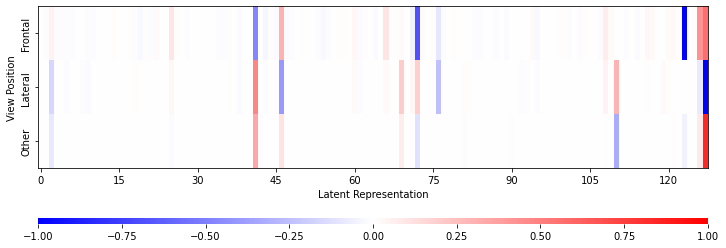

In [107]:
grid_kws = {"height_ratios": (.6, .02), "hspace": .6}

col = 'ViewPos'
view_map = {"Frontal": ["PA", "AP", "AP_horizontal"], "Lateral": [ 'LATERAL', 'LL', 'LLD',]}
rev = {vv:k for k, v in view_map.items() for vv in v}
df[col] = df['ViewPosition_DICOM'].apply(lambda x: rev.get(x, "Other")).dropna()#.fillna("Unknown")
averages = df.groupby("ViewPos")[list(vae_cols)].mean()


f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(12, 4))
res = sns.heatmap(averages.values, ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"},
                 cmap="bwr", vmin=-1, vmax=1,
                 yticklabels=averages.index, xticklabels=15)

for _, spine in res.spines.items():
    spine.set_visible(True)
ax.set_xlabel('Latent Representation')
ax.set_ylabel("View Position")
f.savefig(html_top_dir.joinpath("view-pos-3.svg"), bbox_inches='tight')


In [193]:
pc.df.columns.tolist()

['ImageID',
 'ImageDir',
 'StudyDate_DICOM',
 'StudyID',
 'PatientID',
 'PatientBirth',
 'PatientSex_DICOM',
 'ViewPosition_DICOM',
 'Projection',
 'MethodProjection',
 'Pediatric',
 'Modality_DICOM',
 'Manufacturer_DICOM',
 'PhotometricInterpretation_DICOM',
 'PixelRepresentation_DICOM',
 'PixelAspectRatio_DICOM',
 'SpatialResolution_DICOM',
 'BitsStored_DICOM',
 'WindowCenter_DICOM',
 'WindowWidth_DICOM',
 'Rows_DICOM',
 'Columns_DICOM',
 'XRayTubeCurrent_DICOM',
 'Exposure_DICOM',
 'ExposureInuAs_DICOM',
 'ExposureTime',
 'RelativeXRayExposure_DICOM',
 'ReportID',
 'Report',
 'MethodLabel',
 'Labels',
 'Localizations',
 'LabelsLocalizationsBySentence',
 'labelCUIS',
 'LocalizationsCUIS',
 'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Lesion',
 'No Finding',
 'Opacity',
 'Pleural Abnormalities',
 'Pleural Effusion',
 'Pneumonia',
 'StudyDate',
 'Frontal',
 'age',
 'index',
 'mu',
 'logvar',
 'error',
 'mu.000',
 'mu.001',
 'mu.002',
 'mu.003',
 'mu.004',
 'mu.005',
 '

In [196]:

pc.df = pc.df.drop("Peds", axis=1)
pc.df.loc[pc.df['age'] >= 12, "Peds"] = '12y+'
pc.df.loc[pc.df['age'] < 12, "Peds"] = '<12y'
# pc.df['Peds'] = pc.df['Peds'].fillna('PadChest, >12y')


pvae_df = pvae_df.assign(Peds="Ped.\nDataset")

all_ped_df = pd.concat([pc.df, pvae_df])

all_ped_df[["Peds"]+list(vae_cols)]

index = all_ped_df["Peds"].value_counts().index.tolist()

all_ped_df["Peds"].value_counts()

12y+             155513
<12y               5300
Ped.\nDataset      5232
Name: Peds, dtype: int64

In [197]:
all_ped_df = pd.concat([pc.df, pvae_df])

all_ped_df[["Pediatric"]+list(vae_cols)]

,Pediatric,mu.000,mu.001,mu.002,mu.003,mu.004,mu.005,mu.006,mu.007,mu.008,...,mu.118,mu.119,mu.120,mu.121,mu.122,mu.123,mu.124,mu.125,mu.126,mu.127
0,>=12y,0.004903,0.009759,-0.840139,-0.016406,0.012096,0.021054,-0.009488,-0.013038,-0.007536,...,0.008214,-0.124864,-0.011458,-0.035856,-0.005253,-0.525054,-0.012718,-0.015304,1.603692,1.275674
1,>=12y,0.015003,0.008204,-0.873354,-0.000008,-0.065057,0.003706,-0.011845,-0.019623,-0.022494,...,-0.012971,0.116672,0.039970,0.085739,0.074184,0.229820,-0.029106,0.048200,-0.325632,-0.669529
2,>=12y,0.007932,0.017988,-0.004271,0.016084,-0.029747,-0.000219,-0.026263,0.011529,0.005375,...,-0.027014,0.136066,-0.008367,0.004579,-0.013793,-1.722075,0.023675,0.009019,-0.021481,0.648649
3,>=12y,0.019724,0.013938,-0.571398,0.038880,0.047977,0.004053,-0.034299,-0.006654,-0.003766,...,-0.009396,0.090417,-0.011244,-0.067155,-0.050972,0.226032,0.018524,-0.015034,0.068953,0.729789
4,>=12y,-0.039044,-0.007190,-1.345544,0.016048,0.037869,-0.036479,-0.026237,0.021997,-0.024744,...,0.042117,0.080279,0.014332,-0.000268,-0.019087,0.168344,-0.046811,-0.030200,-0.740812,-1.276945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5227,<12y,-0.037355,-0.004716,-0.223054,-0.043860,-0.079772,0.075144,-0.030612,0.042721,0.051152,...,-0.049723,0.088506,-0.107221,0.078236,0.057557,-0.042961,0.010589,0.038109,-1.473002,-0.299723
5228,<12y,-0.063232,0.008780,0.247207,0.074081,0.005340,0.030715,0.017035,0.023397,-0.024480,...,-0.036560,-0.034854,-0.109763,0.024002,0.070907,0.311697,-0.002401,0.028188,-0.597099,-0.048335
5229,<12y,-0.048443,0.044143,0.475988,-0.013113,-0.052051,0.049684,0.018057,0.031787,0.002987,...,-0.010814,-0.133795,-0.087566,0.036279,0.023877,-0.329092,-0.034710,-0.016655,-0.137052,-0.101638
5230,<12y,-0.017312,0.063294,0.539585,0.023244,-0.041532,0.009903,0.090134,0.032368,-0.004417,...,-0.054965,-0.324554,-0.108833,0.035408,0.019570,0.548964,0.001592,-0.029739,-0.448097,0.042223


-0.942066601629672 1.0610716186520082


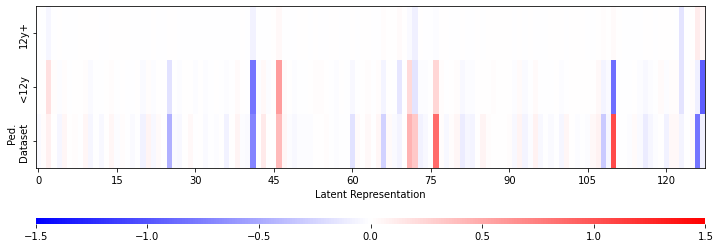

In [198]:
grid_kws = {"height_ratios": (.6, .02), "hspace": .6}

df = all_ped_df

averages = df.groupby("Peds")[list(vae_cols)].mean().loc[index]

print(averages.values.min(), averages.values.max())

f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(12, 4))
res = sns.heatmap(averages.values, ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"},
                 cmap="bwr", vmin=-1.5, vmax=1.5,
                 yticklabels=averages.index, xticklabels=15)

for _, spine in res.spines.items():
    spine.set_visible(True)
ax.set_xlabel('Latent Representation')
# ax.set_ylabel("Age")
f.savefig(html_top_dir.joinpath("peds.svg"), bbox_inches='tight')


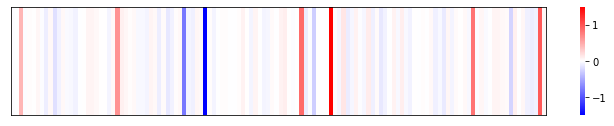

In [211]:
f, ax = plt.subplots(figsize=(12, 2))

res = sns.heatmap(pc.df.sample()[list(vae_cols)], ax=ax, vmin=-1.5, vmax=1.5, cmap="bwr", yticklabels=False, xticklabels=False
            )
for _, spine in res.spines.items():
    spine.set_visible(True)

,mu.000,mu.001,mu.002,mu.003,mu.004,mu.005,mu.006,mu.007,mu.008,mu.009,...,mu.118,mu.119,mu.120,mu.121,mu.122,mu.123,mu.124,mu.125,mu.126,mu.127
No Finding,0.002277,-0.003204,-0.016418,-0.004346,0.001502,0.000146,-0.001683,-0.004598,0.002769,0.008601,...,-0.005052,-0.011520,0.003698,0.002664,0.000479,-0.169421,-0.002087,0.005878,-0.059425,0.143929
Atelectasis,0.001158,-0.001436,-0.067528,0.002065,0.000298,-0.002617,-0.005945,-0.003146,0.001972,-0.003356,...,-0.000231,0.023093,-0.000753,0.005141,-0.006441,-0.146084,-0.000337,0.007867,0.246417,-0.052170
Cardiomegaly,-0.002484,-0.002695,-0.060341,-0.003022,-0.006146,-0.001517,-0.005433,-0.005622,0.003624,-0.007872,...,0.002578,0.017824,0.000230,0.015491,0.006224,-0.050861,-0.003898,0.006634,0.408434,0.007243
Consolidation,-0.002027,-0.001675,0.035858,0.001498,-0.001454,0.001075,-0.000340,-0.002951,0.001310,0.003941,...,-0.000222,0.001487,-0.005680,0.008490,-0.002128,-0.012191,-0.002429,0.005219,0.269045,-0.308744
Edema,-0.006727,-0.001048,-0.194581,-0.004677,-0.010762,0.002124,-0.000163,-0.009335,0.011409,-0.005428,...,0.001127,0.011123,-0.002533,0.024702,0.011751,-0.059259,-0.007406,0.004032,0.414149,-0.064266
Lesion,-0.001129,-0.002484,-0.085311,0.002974,0.001610,-0.002770,-0.004978,-0.003280,0.000144,-0.003899,...,0.000521,0.017581,0.001136,0.003652,-0.004334,-0.220599,-0.001847,0.005317,0.132479,-0.124431
Opacity,0.000336,-0.001536,-0.008140,0.002355,-0.001932,0.001171,-0.003203,-0.002572,0.001879,0.001711,...,-0.001131,0.015461,-0.005137,0.007905,0.000559,-0.073767,-0.002447,0.007130,0.267000,-0.244188
Pleural Abnormalities,-0.000891,-0.001404,-0.030495,0.001369,-0.001851,-0.002169,-0.001825,-0.002772,0.001181,-0.002282,...,0.000557,0.013472,-0.003923,0.010270,-0.002374,0.053687,-0.002324,0.004739,0.410007,-0.163734
Pleural Effusion,-0.001219,-0.000998,0.024716,0.001345,-0.003803,-0.001378,0.000527,-0.002561,0.001483,0.000028,...,0.000392,0.005202,-0.007969,0.014059,-0.000298,0.195924,-0.003075,0.003549,0.537109,-0.212995
Pneumonia,0.000011,-0.001868,0.031705,-0.001784,-0.003300,0.003132,-0.003352,-0.001287,0.004743,0.005030,...,-0.001221,0.008045,-0.005570,0.009684,-0.000620,-0.114258,-0.001409,0.008524,0.229971,-0.379410


-0.5007919467871638 0.5371094577884548


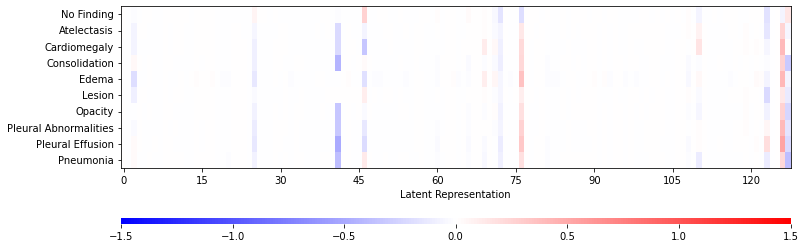

In [181]:
grid_kws = {"height_ratios": (.6, .02), "hspace": .6}

df = pc.df


order = [ 'No Finding',
'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Lesion',

 'Opacity',
 'Pleural Abnormalities',
 'Pleural Effusion',
 'Pneumonia']
averages = {}

for c in list(order):
    averages[c] = df[df[c]>0][list(vae_cols)].mean()

averages = pd.concat(averages, axis=1).T#.sort_values("mu.076")

display(averages)


print(averages.values.min(), averages.values.max())

f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(12, 4))
res = sns.heatmap(averages.values, ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"},
                 cmap="bwr", vmin=-1.5, vmax=1.5,
                 yticklabels=averages.index, xticklabels=15)

for _, spine in res.spines.items():
    spine.set_visible(True)
ax.set_xlabel('Latent Representation')
# ax.set_ylabel("Age")
f.savefig(html_top_dir.joinpath("label.svg"), bbox_inches='tight')


-1.0186364185894365 0.35195693498724473


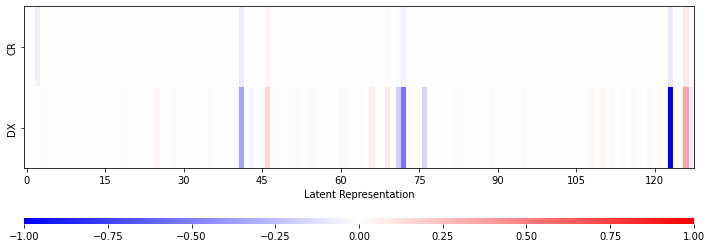

In [190]:
df = pc.df
col = "Modality_DICOM"
grid_kws = {"height_ratios": (.6, .02), "hspace": .6}
averages = df.groupby(col)[list(vae_cols)].mean()

print(averages.values.min(), averages.values.max())

f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(12, 4))
res = sns.heatmap(averages.values, ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"},
                 cmap="bwr", vmin=-1, vmax=1,
                 yticklabels=averages.index, xticklabels=15)

for _, spine in res.spines.items():
    spine.set_visible(True)
ax.set_xlabel('Latent Representation')
# ax.set_ylabel("Age")
f.savefig(html_top_dir.joinpath("modality.svg"), bbox_inches='tight')


-0.24076978113185965 1.0568065668379185


Text(0.5, 70.57399503722087, 'Latent Representation')

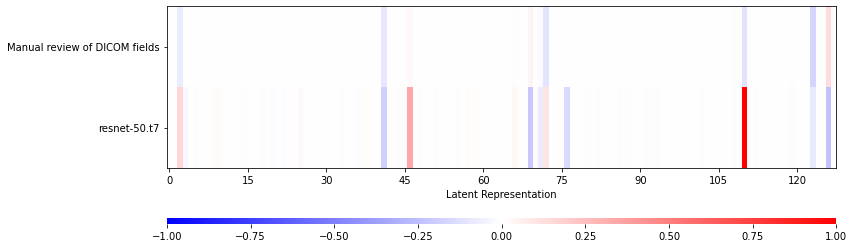

In [195]:
df = pc.df
col = "MethodProjection"
grid_kws = {"height_ratios": (.6, .02), "hspace": .6}
averages = df.groupby(col)[list(vae_cols)].mean()

print(averages.values.min(), averages.values.max())

f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(12, 4))
res = sns.heatmap(averages.values, ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"},
                 cmap="bwr", vmin=-1, vmax=1,
                 yticklabels=averages.index, xticklabels=15)

for _, spine in res.spines.items():
    spine.set_visible(True)
ax.set_xlabel('Latent Representation')
# ax.set_ylabel("Age")
# f.savefig(html_top_dir.joinpath("modality.svg"), bbox_inches='tight')


In [108]:
# fig = make_subplots(1, 1)
# fig.add_trace(go.Heatmap(z=averages.values, y=averages.index, x=list(range(128))))
# # fig.update_layout(legend={"x": .5, "orientation":"h", "borderwidth": .5, "xanchor": "center",})
# # fig.update_traces(colorbar_orientation='h')
# fig.show()

,mu.000,mu.001,mu.002,mu.003,mu.004,mu.005,mu.006,mu.007,mu.008,mu.009,...,mu.118,mu.119,mu.120,mu.121,mu.122,mu.123,mu.124,mu.125,mu.126,mu.127
ViewPos,,,,,,,,,,,,,,,,,,,,,
Frontal,-0.001978,-0.013896,0.050780,-0.011432,-0.009466,-0.010154,-0.011193,-0.004240,0.001913,-0.011826,...,0.000256,-0.007224,0.020813,0.025958,0.011785,-1.115932,-0.004413,0.007910,0.427322,0.567255
Lateral,0.001260,-0.005896,-0.156795,0.002770,0.004265,-0.009546,-0.002743,0.000116,-0.008302,-0.018078,...,0.003895,0.019198,0.008395,-0.002543,0.001465,0.003958,-0.006530,-0.005326,-0.079575,-1.219278
OTHER,-0.001154,-0.003706,-0.088856,0.004507,-0.000129,-0.005036,0.000261,-0.004988,-0.000783,0.000068,...,-0.005202,0.000682,-0.002956,0.008455,0.002876,-0.049938,-0.002203,0.003924,0.082764,0.850334
UNK,0.003593,0.001176,0.011165,-0.003033,0.001457,0.006697,-0.005726,-0.004448,0.007649,0.013096,...,-0.002425,0.010165,-0.001422,0.000058,-0.008306,-0.198819,0.000287,0.012932,0.152103,-0.222087


Index(['Frontal', 'Lateral', 'OTHER', 'UNK'], dtype='object', name='ViewPos')


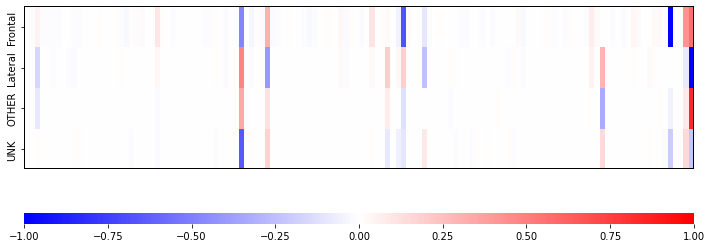

In [35]:

# averages.index = averages.index.tolist()
display(averages)
print(averages.index)
# ix =  [
#  'ANTEROPOSTERIOR',
#  'AP',
#  'POSTEROANTERIOR',
#  'PA',
#  'RL',
#  'LATERAL',
#  'LL',
#  'LLD',
#  'OBLICUA',
#  'GENERICA',
#  ]
# averages = averages.loc[ix]


In [ ]:
df['age']

In [ ]:
df['age_cat'] = pd.cut(df['age'],12)



In [ ]:
averages = df.groupby("Pediatric")[list(vae_cols)].mean()
grid_kws = {"height_ratios": (.75, .05), "hspace": .5}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(12, 4))
ax = sns.heatmap(averages.values, ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"},
                 cmap="bwr", vmin=-1, vmax=1,
                 yticklabels=averages.index, xticklabels=[],
                 )
ax.axhline(y=0, color='k',linewidth=2)
ax.axhline(y=len(averages), color='k',linewidth=2)
ax.axvline(x=0, color='k',linewidth=2)
ax.axvline(x=len(averages.columns), color='k',linewidth=2)
ax.set_xlabel('$Z$')

In [ ]:
import matplotlib.pylab as plt

all_ped_df = pd.concat([pc.df, pvae_df])
df = all_ped_df
averages = df.groupby("Pediatric")[list(vae_cols)].mean()
averages = pd.concat([averages, df[list(vae_cols)].mean(axis=0).rename("All").to_frame().T], axis=0)

averages



In [ ]:
import matplotlib.pylab as plt

all_ped_df = pd.concat([pc.df, pvae_df])
df = all_ped_df
averages = df.groupby("Pediatric")[list(vae_cols)].mean()
# averages = pd.concat([averages, df[list(vae_cols)].mean(axis=0).rename("All").to_frame().T], axis=0)

averages

a = averages.abs().max(axis=0)
a = a[a>.1]
print(len(a))

diffs = (averages.iloc[0, :]-averages.iloc[1, :]).abs()
th = .1#diffs.quantile(.90)

idx = diffs[diffs>=th].index
idx = a.index
fig = make_subplots(1, 1)
for name, grp in averages.groupby(level=0):
    b = grp[idx].mean()

    fig.add_trace(
            go.Bar(x=b.index.map(lambda x: (x.split('.')[1].lstrip("0"))), y=b.values, name=name), row=1, col=1
    )
fig.show()


# pc.df.groupby(col)[list(vae_cols)].mean().iloc[0, :].plot(kind='bar')


# pc.df.groupby(col)[list(vae_cols)].mean().iloc[1, :].plot(kind='bar')

# b

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))

im = np.vstack([averages.iloc[0, :].values.reshape((1, 128)), averages.iloc[1, :].values.reshape((1, 128)), ])
ax.imshow(im)

In [ ]:
import seaborn as sns

In [ ]:
grid_kws = {"height_ratios": (.75, .05), "hspace": .5}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(12, 4))
ax = sns.heatmap(im, ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"},
                 cmap="bwr", vmin=-1, vmax=1,
                 yticklabels=["Not Peds", "Peds"])

In [ ]:
sns.heatmap(im, yticklabels=["Not Peds", "Peds"], cmap="bwr", vmin=-1, vmax=1, )

In [ ]:
plt.imshow(averages.iloc[1, :].values.reshape((8, 16)))

In [212]:
import seaborn as sns


val

NameError: name 'val' is not defined

In [ ]:
import matplotlib.pylab as plt


df = all_ped_df
df = pc.df
averages = df.groupby("Pediatric")[list(vae_cols)].mean()

averages

diffs = (averages.iloc[0, :]-averages.iloc[1, :]).abs()
# th = .1 #diffs.quantile(.75)

idx = diffs[diffs>=th].index


fig = make_subplots(1, 1)
for name, grp in df.groupby(col):
    b = grp[idx].mean()
    
    fig.add_trace(
            go.Bar(x=b.index.map(lambda x: (x.split('.')[1].lstrip("0"))), y=b.values, name=name), row=1, col=1
    )
fig.show()


# pc.df.groupby(col)[list(vae_cols)].mean().iloc[0, :].plot(kind='bar')


# pc.df.groupby(col)[list(vae_cols)].mean().iloc[1, :].plot(kind='bar')

# b

In [ ]:
from IPython.display import display_html, display_markdown, HTML, Markdown, display
import json
import os

output_dir = str(settings.TOP_DIR.joinpath('html'))
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

N = 8

sas = "sv=2020-08-04&st=2021-12-21T17%3A37%3A50Z&se=2022-12-22T17%3A37%3A00Z&sr=c&sp=rl&sig=I30VhloVfnAzyzFNjeTD6q8Qk472r9xYtW59s3SZZ5g%3D"
container_url = "https://mlopsday2datasets.blob.core.windows.net/padchest/png/"

fname=f'vae[{data}]-metadata[{col}]'

# <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/twitter-bootstrap/4.0.0-alpha.4/css/bootstrap.min.css">
html = """
<style>
.container {
    width: 80%;
    margin: 0 auto;
  }

.gallery {
    display: block; 
    line-height:0;
   -webkit-column-count:5; /* split it into 5 columns */
   -webkit-column-gap:5px; /* give it a 5px gap between columns */
   -moz-column-count:5;
   -moz-column-gap:5px;
   column-count:4;
   column-gap:5px;
   background-color: darkslategray;
}

.gallery img {
   width: 100% !important;
   height: auto !important;
   margin-bottom:5px; /* to match column gap */
}
    </style>
    
    
<div class="container">
"""

html += f"""<div class="row"><h1>{col}</h1></div>
"""

html += """<div class="row">""" + fig.to_html() + """</div>"""
N = 16
for c in keep.index[::-1]:
    sample_top = pc.df.sort_values(c, ascending=False).iloc[:8]
    html += f"""<h2>{c} (Highest)<h2><div class="row gallery">\n"""
    for i, (ix, row) in enumerate(sample_top.sort_index().iterrows()):
        tooltip = {k: str(v) for k, v in row.to_dict().items()}
        tooltip = json.dumps(tooltip, indent=2).replace('"', '').strip("{").strip()
        html += """
        <img data="{ImageDir}/{ImageID}" 
        class="padchest" id="{i}" >
      """.format(
            i=i, **row, tooltip=tooltip)
    html += f"""</div> <!-- row -->"""
    sample_bottom = pc.df.sort_values(c, ascending=False).iloc[-8:]
    html += f"""<h2>{c} (Lowest)<h2><div class="row gallery">\n"""
    for i, (ix, row) in enumerate(sample_bottom.sort_index().iterrows()):
        tooltip = {k: str(v) for k, v in row.to_dict().items()}
        tooltip = json.dumps(tooltip, indent=2).replace('"', '').strip("{").strip()
        html += """
        <img data="{ImageDir}/{ImageID}" 
        class="padchest" id="{i}" >
      """.format(
            i=i, **row, tooltip=tooltip)
    html += f"""</div> <!-- row -->
    <hr size="8" width="100%" color="green">
    """

html += f"""
</div> <!-- container -->
<script>
const url = "{container_url}"; 
const sas = "{sas}"; 
var x = document.getElementsByClassName("padchest");
var i;
for (i = 0; i < x.length; i++) {{
  let data = x[i].getAttribute("data");
  x[i].src = url + data + "?" + sas
}}
</script>
"""

print(fname)
with open(f"{output_dir}/{fname}.html", 'w') as f:
    print(html, file=f)


In [ ]:
from IPython.display import display_html, display_markdown, HTML, Markdown, display
import json
import os
from tqdm import tqdm

# sample_top = pc.df.sort_values('age', ascending=False).iloc[:N]

In [ ]:
from IPython.display import display_html, display_markdown, HTML, Markdown, display
import json
import os

output_dir = str(settings.TOP_DIR.joinpath(f"html/vae[{data}]"))
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

N = 8

sas = "sv=2020-08-04&st=2021-12-21T17%3A37%3A50Z&se=2022-12-22T17%3A37%3A00Z&sr=c&sp=rl&sig=I30VhloVfnAzyzFNjeTD6q8Qk472r9xYtW59s3SZZ5g%3D"
container_url = "https://mlopsday2datasets.blob.core.windows.net/padchest/png/"
for c in tqdm(vae_cols):
  fname=f'{c}'

  # <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/twitter-bootstrap/4.0.0-alpha.4/css/bootstrap.min.css">
  html = """
  <style>
  .container {
      width: 80%;
      margin: 0 auto;
    }

  .gallery {
      display: block; 
      line-height:0;
    -webkit-column-count:5; /* split it into 5 columns */
    -webkit-column-gap:5px; /* give it a 5px gap between columns */
    -moz-column-count:5;
    -moz-column-gap:5px;
    column-count:4;
    column-gap:5px;
    background-color: darkslategray;
  }

  .gallery img {
    width: 100% !important;
    height: auto !important;
    margin-bottom:5px; /* to match column gap */
  }
      </style>
      
      
  <div class="container">
  """

  vals = pc.df[c].describe().drop(['count', 'std']).sort_values()
  html += f"""<h1>{c}<h1>"""
  for t, val in vals.items():

    loc = (val-pc.df[c]).abs().sort_values(ascending=True).iloc[:N].index
    html += f"""<h2>Closest to {t} of {c}<h2><div class="row gallery">\n"""
    for i, (ix, row) in enumerate(pc.df.loc[loc].iterrows()):
        tooltip = {k: str(v) for k, v in row.to_dict().items()}
        tooltip = json.dumps(tooltip, indent=2).replace('"', '').strip("{").strip()
        html += """
        <img data="{ImageDir}/{ImageID}" 
        class="padchest" id="{i}" >
      """.format(
            i=i, **row, tooltip=tooltip)
    html += f"""</div> <!-- row -->"""
  
  
  # loc = (pc.df[c].mean()-pc.df[c]).abs().sort_values(ascending=True).iloc[:N].index
  
  # html += f"""<h2>{c} (Near Mean)<h2><div class="row gallery">\n"""
  # for i, (ix, row) in enumerate(pc.df.loc[loc].iterrows()):
  #     tooltip = {k: str(v) for k, v in row.to_dict().items()}
  #     tooltip = json.dumps(tooltip, indent=2).replace('"', '').strip("{").strip()
  #     html += """
  #     <img data="{ImageDir}/{ImageID}" 
  #     class="padchest" id="{i}" >
  #   """.format(
  #         i=i, **row, tooltip=tooltip)
  # html += f"""</div> <!-- row -->"""
  
  
  
  # sample_bottom = pc.df.sort_values(c, ascending=True).iloc[:N]
  # html += f"""<h2>{c} (Lowest)<h2><div class="row gallery">\n"""
  # for i, (ix, row) in enumerate(sample_bottom.sort_index().iterrows()):
  #     tooltip = {k: str(v) for k, v in row.to_dict().items()}
  #     tooltip = json.dumps(tooltip, indent=2).replace('"', '').strip("{").strip()
  #     html += """
  #     <img data="{ImageDir}/{ImageID}" 
  #     class="padchest" id="{i}" >
  #   """.format(
  #         i=i, **row, tooltip=tooltip)
  # html += f"""</div> <!-- row -->
  
  html += """<hr size="8" width="100%" color="green">"""

  html += f"""
  </div> <!-- container -->
  <script>
  const url = "{container_url}"; 
  const sas = "{sas}"; 
  var x = document.getElementsByClassName("padchest");
  var i;
  for (i = 0; i < x.length; i++) {{
    let data = x[i].getAttribute("data");
    x[i].src = url + data + "?" + sas
  }}
  </script>
  """
  with open(f"{output_dir}/{fname}.html", 'w') as f:
      print(html, file=f)


In [ ]:
def do_coor(col, bins=3, qrt=0.95):
    df = {}
    series = pc.df[col]
    if "float" in series.dtype.name:
        series = pd.cut(series, bins=bins, retbins=False)

    cats = series.unique()
    try:
        cats = sorted(cats, key=lambda x: x.left if hasattr(x, "left") else x)
    except:
        pass
    for cat in cats:
        s = series == cat
        m = pc.df[vae_cols].corrwith(s)
        df[cat] = m

    df = pd.concat(df, axis=1)
    top_corr = (df.max(axis=1)-df.min(axis=1)).sort_values().rename("corr")
    bp = top_corr.quantile(qrt)
    keep = top_corr[top_corr >= bp]
    return top_corr[keep.index].rename(col).to_frame().T


html = ["<h1>Max Difference Correlations"]
for cc in metadata_cols:
    tp = do_coor(cc)
    html.append(tp.to_html())

output_dir = str(settings.TOP_DIR.joinpath(f"html"))
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

with open(f"{output_dir}/vae[{data}]-correlations.html", 'w') as f:
    print("<br />".join(html), file=f)


In [ ]:
# frontal only interesting
col = "activation.No Finding"
"Manufacturer_DICOM"


# all-data
"Frontal"
"activation.No Finding"
